# WeatherPy



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

coordinates = list(lat_lngs)

# Identify nearest city for each lat, lng combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Plots to Showcase the Relationship Between Weather Variables and Latitude

### Using OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

url = base_url + 'APPID=' + weather_api_key + '&units=metric'

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url).json()

        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]       
            
            # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
         

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | anzhero-sudzhensk
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | ust-kuyga
Processing Record 5 of Set 1 | juneau
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | rocha
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | rwamagana
Processing Record 17 of Set 1 | bakel
Processing Record 18 of Set 1 | ketchikan
Processing Record 19 of Set 1 | tula
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | amderma
City not found. Skipping...
Processing Record 22 of Set 1 | iqaluit
Processing Recor

Processing Record 39 of Set 4 | charlestown
Processing Record 40 of Set 4 | labuhan
Processing Record 41 of Set 4 | olafsvik
Processing Record 42 of Set 4 | norsup
Processing Record 43 of Set 4 | baruun-urt
Processing Record 44 of Set 4 | karratha
Processing Record 45 of Set 4 | haademeeste
City not found. Skipping...
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 48 of Set 4 | assela
City not found. Skipping...
Processing Record 49 of Set 4 | bintulu
Processing Record 0 of Set 5 | leopold
Processing Record 1 of Set 5 | tam ky
Processing Record 2 of Set 5 | launceston
Processing Record 3 of Set 5 | sataua
City not found. Skipping...
Processing Record 4 of Set 5 | padang
Processing Record 5 of Set 5 | beloha
Processing Record 6 of Set 5 | jalu
Processing Record 7 of Set 5 | sarangani
Processing Record 8 of Set 5 | voyvozh
Processing Record 9 of Set 5 | kaseda
Processing Record 10 of Set 5 | khatanga
Process

Processing Record 28 of Set 8 | karomatan
City not found. Skipping...
Processing Record 29 of Set 8 | wasilla
Processing Record 30 of Set 8 | vanimo
Processing Record 31 of Set 8 | nosy varika
Processing Record 32 of Set 8 | phan rang
City not found. Skipping...
Processing Record 33 of Set 8 | adrar
Processing Record 34 of Set 8 | gimli
Processing Record 35 of Set 8 | te anau
Processing Record 36 of Set 8 | abu dhabi
Processing Record 37 of Set 8 | constantine
Processing Record 38 of Set 8 | mackay
Processing Record 39 of Set 8 | urucui
Processing Record 40 of Set 8 | pastos bons
Processing Record 41 of Set 8 | aguimes
Processing Record 42 of Set 8 | hebi
Processing Record 43 of Set 8 | pacific grove
Processing Record 44 of Set 8 | carutapera
Processing Record 45 of Set 8 | aripuana
Processing Record 46 of Set 8 | yinchuan
Processing Record 47 of Set 8 | methoni
Processing Record 48 of Set 8 | sao joao da barra
Processing Record 49 of Set 8 | carballo
Processing Record 0 of Set 9 | wel

Processing Record 18 of Set 12 | muisne
Processing Record 19 of Set 12 | boa vista
Processing Record 20 of Set 12 | mitchell
Processing Record 21 of Set 12 | ijaki
City not found. Skipping...
Processing Record 22 of Set 12 | centralia
Processing Record 23 of Set 12 | kodinsk
Processing Record 24 of Set 12 | lithakia
Processing Record 25 of Set 12 | nguiu
City not found. Skipping...
Processing Record 26 of Set 12 | bac lieu
Processing Record 27 of Set 12 | revelstoke
Processing Record 28 of Set 12 | aquiraz
Processing Record 29 of Set 12 | feijo
Processing Record 30 of Set 12 | hokitika
Processing Record 31 of Set 12 | nokha
Processing Record 32 of Set 12 | komsomolskiy
Processing Record 33 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 34 of Set 12 | dnestrovsc
Processing Record 35 of Set 12 | drayton valley
Processing Record 36 of Set 12 | rosarno
Processing Record 37 of Set 12 | la union
Processing Record 38 of Set 12 | grande-riviere
City not found. Skipping...
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data).sort_index(axis=1)

# Show Record Count
city_data_df.count()

City          559
Cloudiness    559
Country       559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Codrington,0,AU,54,-38.2667,141.9667,17.69,3.54
1,Anzhero-Sudzhensk,100,RU,93,56.0810,86.0285,-5.31,4.91
2,Cape Town,1,ZA,66,-33.9258,18.4232,24.10,6.26
3,Ust-Kuyga,93,RU,100,70.0167,135.6000,-47.31,2.06
4,Juneau,100,US,97,58.3019,-134.4197,3.39,1.54


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,
0,Codrington,0,AU,54,-38.2667,141.9667,17.69,3.54
1,Anzhero-Sudzhensk,100,RU,93,56.0810,86.0285,-5.31,4.91
2,Cape Town,1,ZA,66,-33.9258,18.4232,24.10,6.26
3,Ust-Kuyga,93,RU,100,70.0167,135.6000,-47.31,2.06
4,Juneau,100,US,97,58.3019,-134.4197,3.39,1.54


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

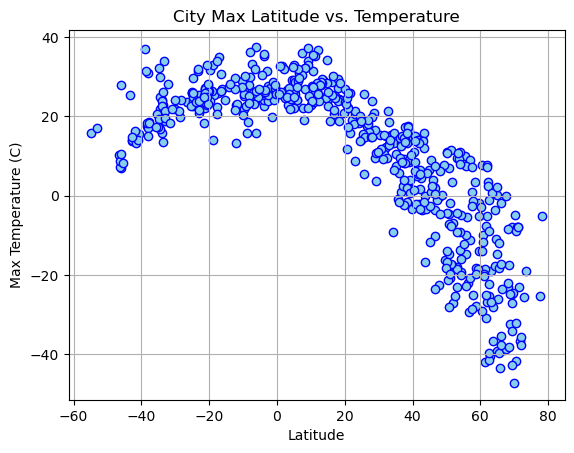

In [15]:
# scatter plot for latitude vs. temperature

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values, y_values, edgecolors = "blue", color = "skyblue")
plt.grid()
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

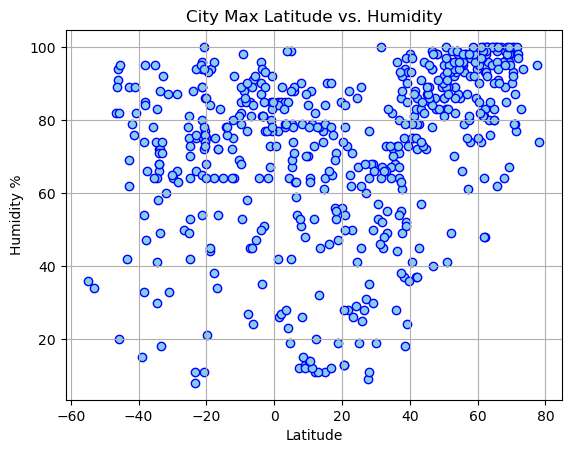

In [14]:
# scatter plots for latitude vs. humidity


x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values, y_values, edgecolors = "blue", color = "skyblue")
plt.grid()
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

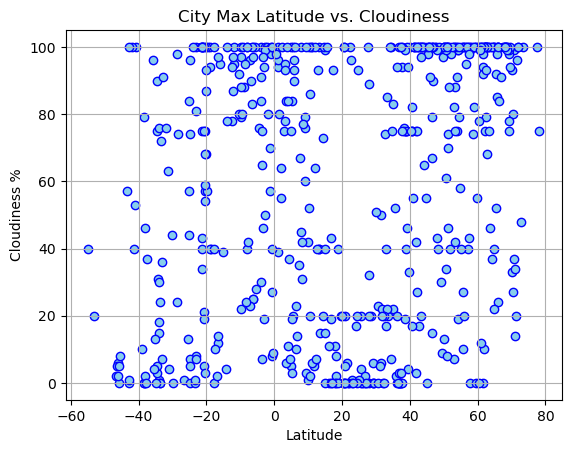

In [13]:
# scatter plots for latitude vs. cloudiness


x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values, y_values, edgecolors = "blue", color = "skyblue")
plt.grid()
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

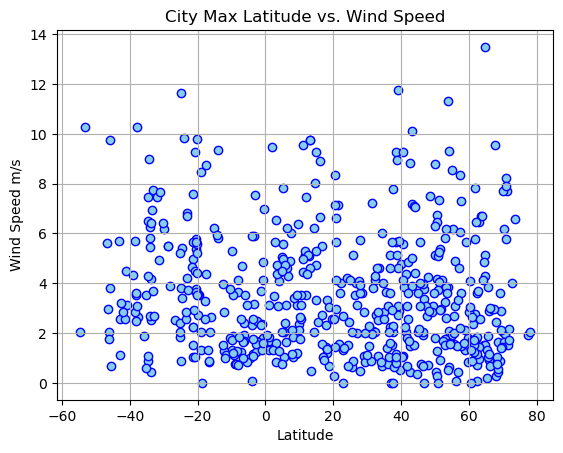

In [12]:
# scatter plots for latitude vs. wind speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values, y_values, edgecolors = "blue", color = "skyblue")
plt.grid()
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Linear Regression for Each Relationship


In [16]:
# DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df= city_data_df.loc[city_data_df["Lat"] >= 0]

northern_hemi_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,
1,Anzhero-Sudzhensk,100,RU,93,56.0810,86.0285,-5.31,4.91
3,Ust-Kuyga,93,RU,100,70.0167,135.6000,-47.31,2.06
4,Juneau,100,US,97,58.3019,-134.4197,3.39,1.54
5,Dikson,100,RU,94,73.5069,80.5464,-18.92,6.57
6,Yellowknife,100,CA,100,62.4560,-114.3525,-22.28,0.07


In [17]:
#DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

southern_hemi_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,
0,Codrington,0,AU,54,-38.2667,141.9667,17.69,3.54
2,Cape Town,1,ZA,66,-33.9258,18.4232,24.10,6.26
7,Rocha,3,UY,30,-34.4833,-54.3333,29.83,7.46
10,Avarua,100,CK,94,-21.2078,-159.7750,22.03,1.03
11,Bluff,2,NZ,82,-46.6000,168.3333,10.16,5.63


###  Temperature vs. Latitude Linear Regression Plot

**Northern Hemisphere**

The r value is: -0.8698329605702818


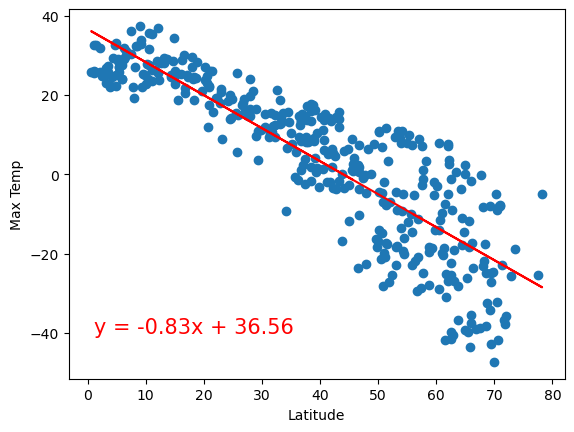

<Figure size 640x480 with 0 Axes>

In [24]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r value is: {rvalue}")
plt.show()

plt.savefig("../output_data/Fig5.png")

**Southern Hemisphere**

The r value is: 0.5169416475012977


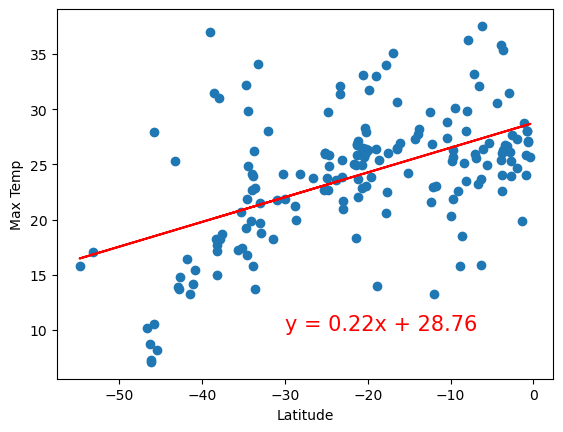

<Figure size 640x480 with 0 Axes>

In [28]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r value is: {rvalue}")
plt.show()

plt.savefig("../output_data/Fig6.png")

In the northern hemisphere, as the latitude increases, the temperature decreases. For the southern hemisphere the opposite is true: there is a positive correlation between the temperature and the latitude.

### Humidity vs. Latitude Linear Regression Plot

**Northern Hemisphere**

The r value is: 0.5327039864529597


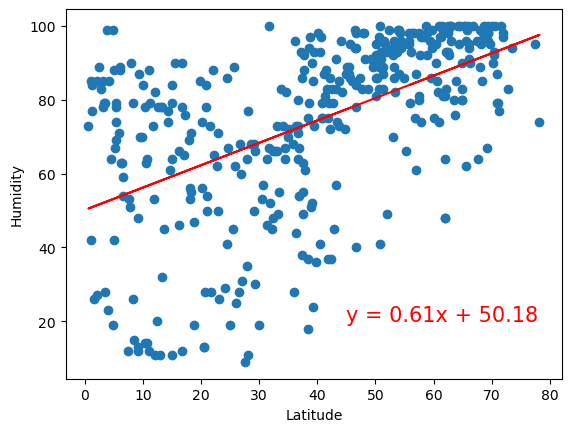

<Figure size 640x480 with 0 Axes>

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r value is: {rvalue}")
plt.show()

plt.savefig("../output_data/Fig7.png")

**Southern Hemisphere**

The r value is: 0.17405711735854748


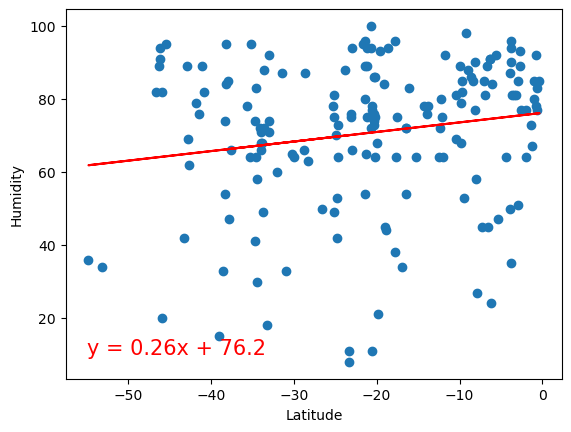

<Figure size 640x480 with 0 Axes>

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r value is: {rvalue}")
plt.show()

plt.savefig("../output_data/Fig8.png")

In both hemispheres there is a positive correlation between latitude and humidity, however this is more pronounced in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

**Northern Hemisphere**

The r value is: 0.3338860363049592


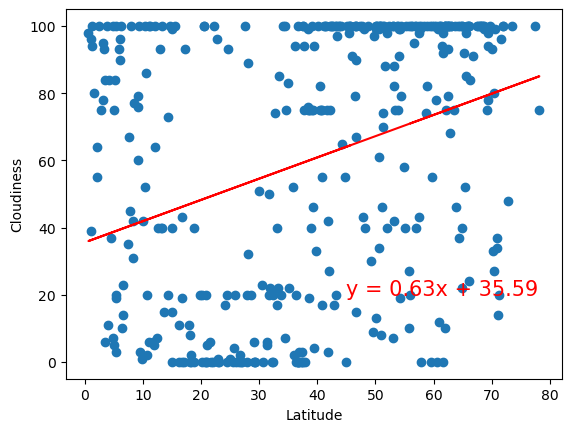

<Figure size 640x480 with 0 Axes>

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r value is: {rvalue}")
plt.show()

plt.savefig("../output_data/Fig9.png")

**Southern Hemisphere**

The r value is: 0.41216625174169425


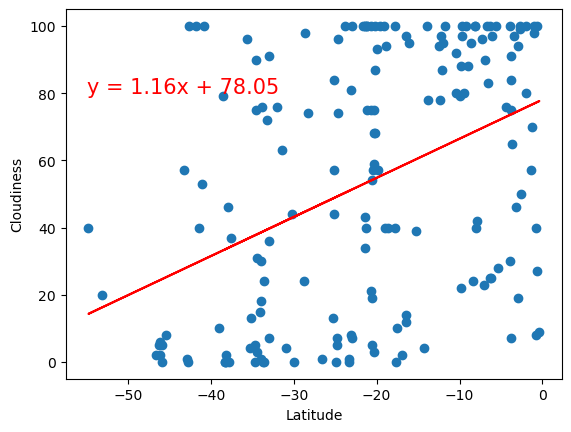

<Figure size 640x480 with 0 Axes>

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r value is: {rvalue}")
plt.show()

plt.savefig("../output_data/Fig10.png")

In both hemispheres, there is a positive correlation between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

**Northern Hemisphere**

The r value is: -0.0660994049872202


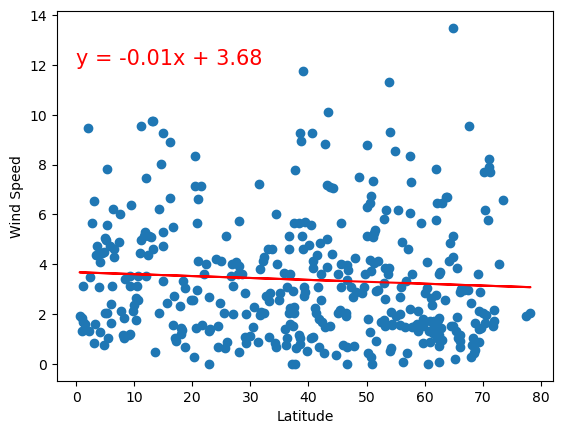

<Figure size 640x480 with 0 Axes>

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r value is: {rvalue}")
plt.show()

plt.savefig("../output_data/Fig11.png")

**Southern Hemisphere**

The r value is: -0.26974289240652616


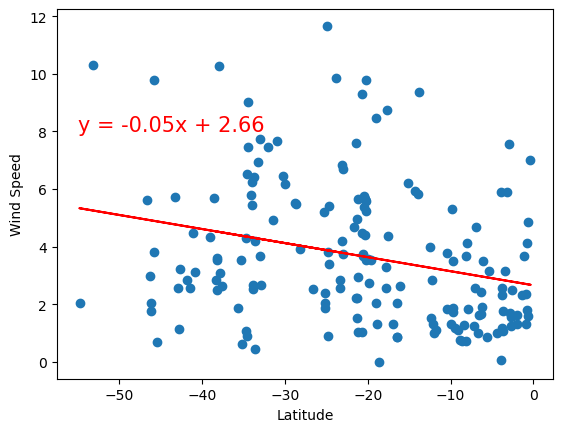

<Figure size 640x480 with 0 Axes>

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r value is: {rvalue}")
plt.show()

plt.savefig("../output_data/Fig12.png")

In both hemispheres there is a negative correlation between latitude and wind speed, however this is more pronounced in the southern hemisphere.